# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading datasets

In [2]:
data = pd.read_csv("D:\\Data analysis\\PS_20174392719_1491204439457_log.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

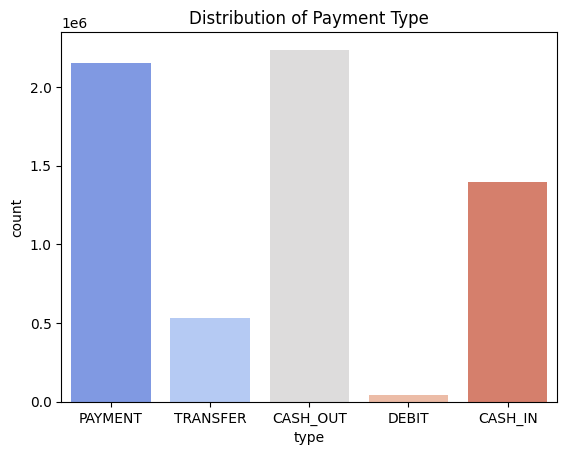

In [8]:
sns.countplot(data,x='type',palette='coolwarm')
plt.title("Distribution of Payment Type")
plt.show()

In [9]:
data.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [10]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [11]:
data['type'].replace({'DEBIT':0,'TRANSFER':1,'CASH_IN':2,'PAYMENT':3,'CASH_OUT':4},inplace=True)

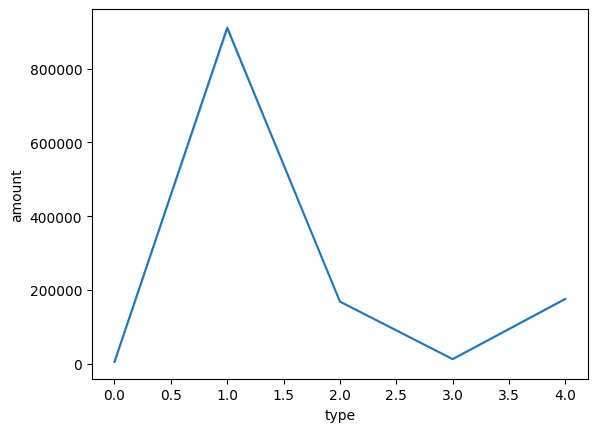

In [12]:
sns.lineplot(data,x='type',y='amount')
plt.show()

# Feature Extraction

In [13]:
data.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.012627,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,-0.012627,1.000000,-0.198987,-0.260418,-0.270669,-0.066255,-0.079111,-0.016171,-0.003144
amount,0.022373,-0.198987,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.260418,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.270669,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,-0.066255,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.079111,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,-0.016171,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,-0.003144,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


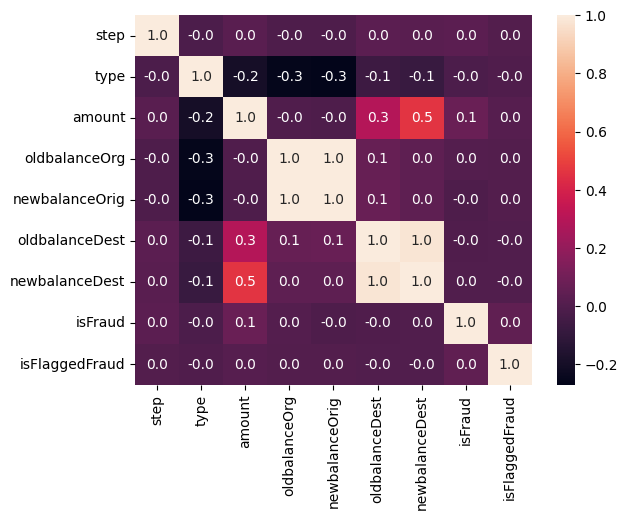

In [14]:
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

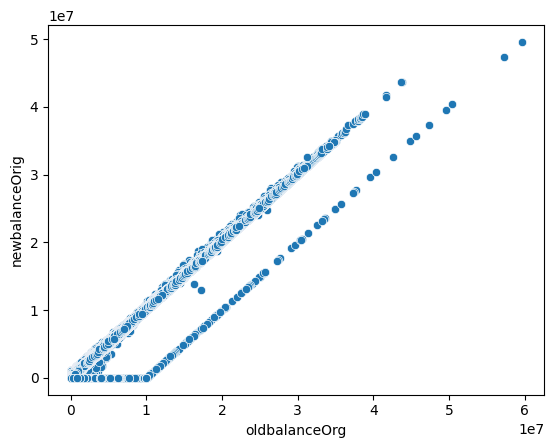

In [15]:
sns.scatterplot(data,x='oldbalanceOrg',y='newbalanceOrig')
plt.show()

In [16]:
data.drop(['step','isFlaggedFraud'],axis=1,inplace=True)

In [17]:
data.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

# Model training

In [18]:
X = data.drop(['isFraud'],axis=1)
y = data['isFraud']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [23]:
scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [24]:
models = {
    'lr': LogisticRegression(),
    'dtc': DecisionTreeClassifier()
}
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    prediction = model.predict(X_test_scaled)
    print(f"{name} gives accuracy {accuracy_score(y_test,prediction)}")

lr gives accuracy 0.9991644951293649
dtc gives accuracy 0.999738472516039


In [25]:
# DecisionTreeClassifier gives best accuracy, so it is selected.

In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
prediction_dtc = dtc.predict(X_test_scaled)

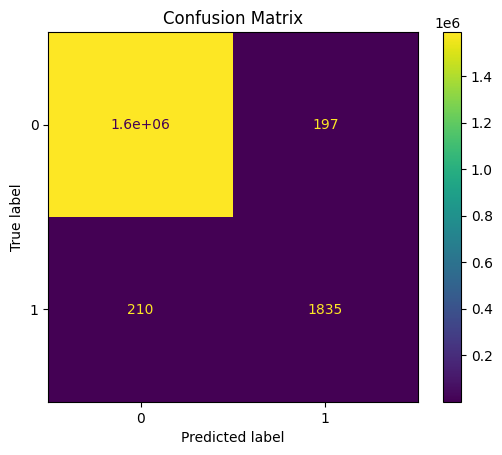

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_true=y_test, y_pred=prediction_dtc)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix')
plt.show()

In [34]:
print(classification_report(y_test,prediction_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.90      0.90      0.90      2045

    accuracy                           1.00   1590655
   macro avg       0.95      0.95      0.95   1590655
weighted avg       1.00      1.00      1.00   1590655



# Model saving

In [27]:
import pickle
pickle.dump(dtc,open('online_fraud_detection_model.pkl','wb'))